# Habermann DataSet EDA

# 1.High Level Statistics

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#Load habermann.csv into a pandas dataFrame.
column_name = ['Age' , 'Operation_Year' ,'Axil_Nodes' , 'Surv_Status' ]
haberman = pd.read_csv('haberman.csv' , header = None , names = column_name)


In [12]:
haberman

,Age,Operation_Year,Axil_Nodes,Surv_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [13]:
# (Q) how many data-points and features?
print (haberman.shape)

(306, 4)


In [14]:
#(Q) What are the column names in our dataset?
print (haberman.columns)

Index(['Age', 'Operation_Year', 'Axil_Nodes', 'Surv_Status'], dtype='object')


In [17]:
#(Q) How many data points for each class are present? 

haberman["Surv_Status"].value_counts()

1    225
2     81
Name: Surv_Status, dtype: int64

# 2. Objective

To find and predict whether the patient will survive the given treatment or not

# 3. Univariate Analysis

# 3.1. PDF

C:\Users\MANISH\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\MANISH\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


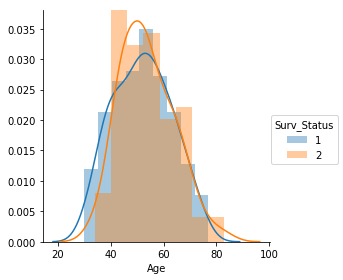

In [24]:
# Age
sns.FacetGrid(haberman , hue = 'Surv_Status' , size = 4).map(sns.distplot , 'Age').add_legend();
plt.show();

C:\Users\MANISH\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\MANISH\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


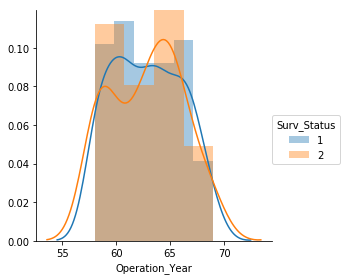

In [30]:
# Operation Year
sns.FacetGrid(haberman , hue = 'Surv_Status' , size = 4).map(sns.distplot , 'Operation_Year').add_legend();
plt.show();

C:\Users\MANISH\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\MANISH\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


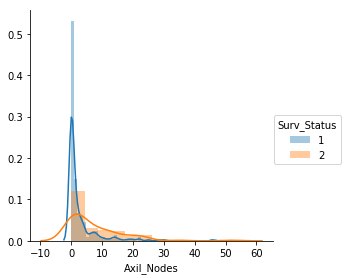

In [32]:
#Axil_Nodes
sns.FacetGrid(haberman , hue = 'Surv_Status' , size = 4).map(sns.distplot , 'Axil_Nodes').add_legend();
plt.show();

# 3.2. CDF

In [51]:
class_1 = haberman.loc[haberman["Surv_Status"] == 1]
class_2 = haberman.loc[haberman["Surv_Status"] == 2]

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


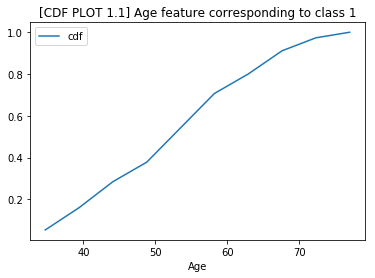

In [58]:
#Age feature corresponding to class 1

counts, bin_edges = np.histogram(class_1['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, label = 'cdf')
plt.xlabel('Age')
plt.title("[CDF PLOT 1.1] Age feature corresponding to class 1")
plt.legend()
plt.show()

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


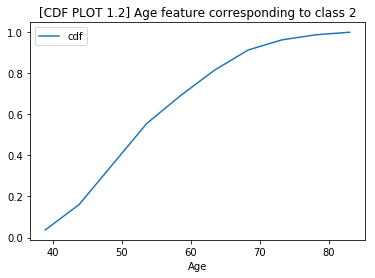

In [59]:
#Age feature corresponding to class 2

counts, bin_edges = np.histogram(class_2['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, label = 'cdf')
plt.xlabel('Age')
plt.title("[CDF PLOT 1.2] Age feature corresponding to class 2")
plt.legend()
plt.show()

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


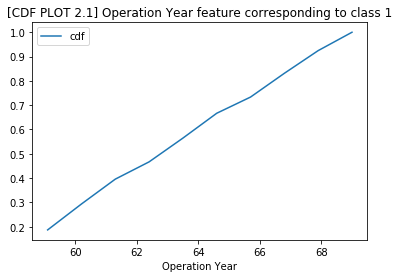

In [60]:
#Operation Year corresponding to class 1

counts, bin_edges = np.histogram(class_1['Operation_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, label = 'cdf')
plt.xlabel('Operation Year')
plt.title("[CDF PLOT 2.1] Operation Year feature corresponding to class 1")
plt.legend()
plt.show()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


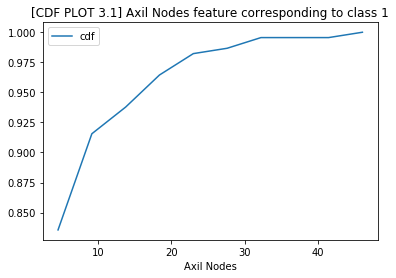

In [66]:
#Axil Nodes corresponding to class 1

counts, bin_edges = np.histogram(class_['Axil_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, label = 'cdf')
plt.xlabel('Axil Nodes')
plt.title("[CDF PLOT 3.1] Axil Nodes feature corresponding to class 1")
plt.legend()
plt.show()

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


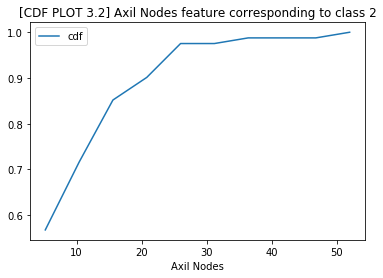

In [70]:
#Axil Nodes corresponding to class 2

counts, bin_edges = np.histogram(class_2['Axil_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, label = 'cdf')
plt.xlabel('Axil Nodes')
plt.title("[CDF PLOT 3.2] Axil Nodes feature corresponding to class 2")
plt.legend()
plt.show()

# 3.3. BOX PLOT

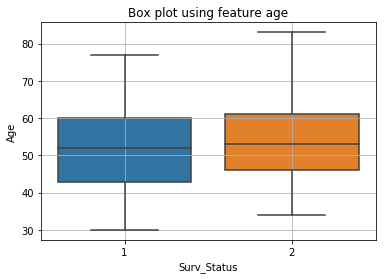

In [73]:
#Box plot using feature age
sns.boxplot(x='Surv_Status',y='Age', data=haberman)
plt.grid()
plt.title("Box plot using feature age")
plt.show()

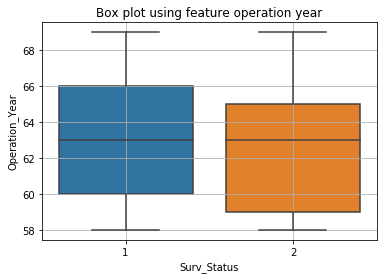

In [75]:
#Box plot using feature operation year
sns.boxplot(x='Surv_Status',y='Operation_Year', data=haberman)
plt.grid()
plt.title("Box plot using feature operation year")
plt.show()

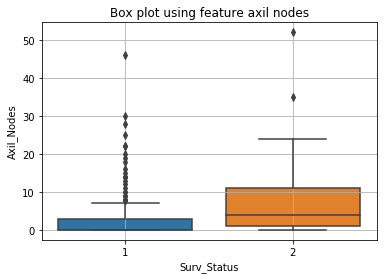

In [81]:
#Box plot using feature Axil Nodes
sns.boxplot(x='Surv_Status',y='Axil_Nodes', data=haberman)
plt.grid()
plt.title("Box plot using feature axil nodes")
plt.show()

# 3.4. VIOLIN PLOT

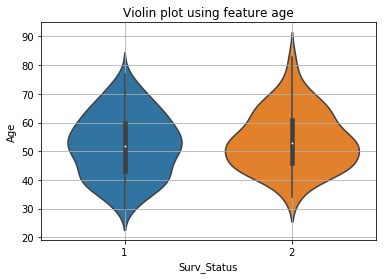

In [82]:
#Violin plot using feature age
sns.violinplot(x='Surv_Status',y='Age', data=haberman)
plt.grid()
plt.title("Violin plot using feature age")
plt.show()

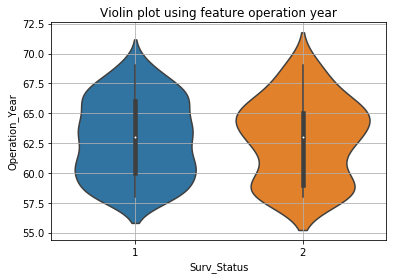

In [83]:
#Violin plot using feature operation year
sns.violinplot(x='Surv_Status',y='Operation_Year', data=haberman)
plt.grid()
plt.title("Violin plot using feature operation year")
plt.show()

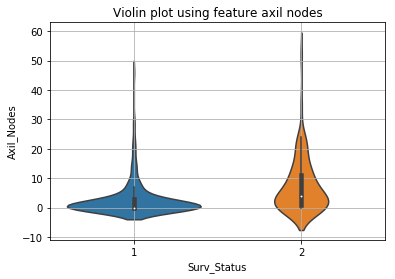

In [87]:
#Violin plot using feature Axil Nodes
sns.violinplot(x='Surv_Status',y='Axil_Nodes', data=haberman)
plt.grid()
plt.title("Violin plot using feature axil nodes")
plt.show()

# 4. BIVARIATE ANAYSIS

# 4.1. Scatter Plot 

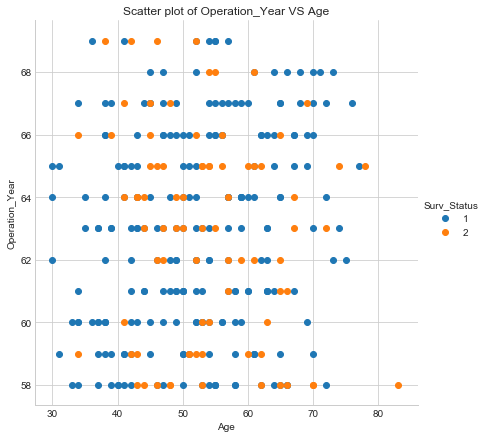

In [88]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Surv_Status", size=6).map(plt.scatter, "Age", "Operation_Year").add_legend();
plt.title("Scatter plot of Operation_Year VS Age");
plt.show();

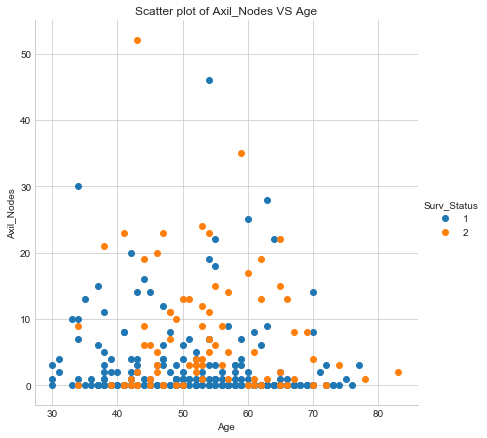

In [90]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Surv_Status", size=6).map(plt.scatter, "Age", "Axil_Nodes").add_legend();
plt.title("Scatter plot of Axil_Nodes VS Age");
plt.show();

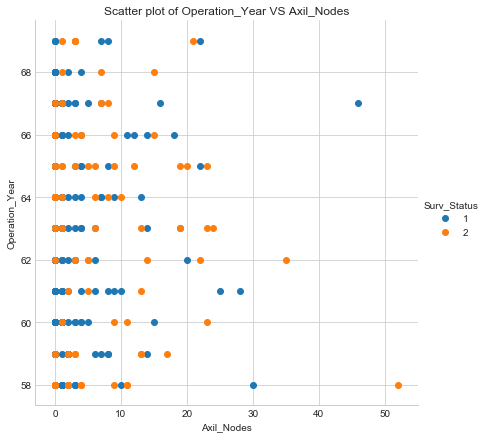

In [91]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Surv_Status", size=6).map(plt.scatter, "Axil_Nodes", "Operation_Year").add_legend();
plt.title("Scatter plot of Operation_Year VS Axil_Nodes")
plt.show();

# 4.2. PAIR PLOT

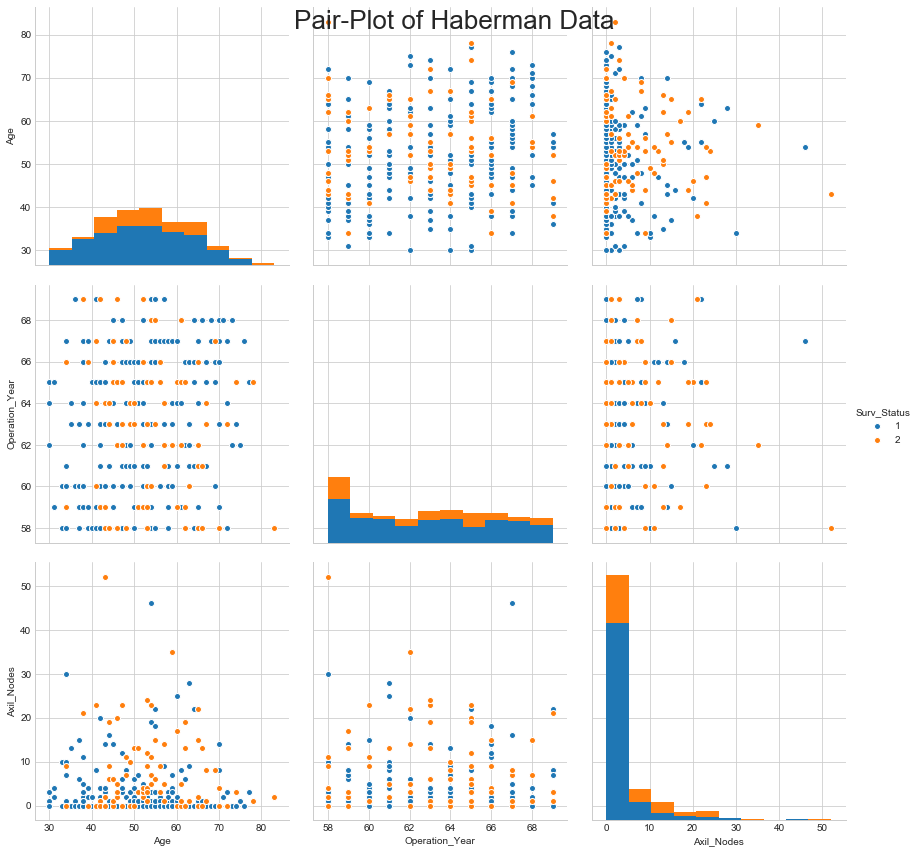

In [92]:
# pairwise scatter plot: Pair-Plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Surv_Status",x_vars =['Age','Operation_Year','Axil_Nodes'],y_vars =['Age','Operation_Year','Axil_Nodes'], size=4);
plt.suptitle("Pair-Plot of Haberman Data",size =26);
plt.show();
